In [1]:
import sys
sys.path.append("..")
from library import *

In [89]:

m_values = np.arange(1, 7)
reps_values = np.array([1, 2, 3, 5, 10])
depth1 = np.zeros(shape=(len(m_values), len(reps_values)))
nngates = np.zeros(shape=(len(m_values), len(reps_values)))


backend = AerSimulator(method="statevector")
for i, m in enumerate(m_values):
    for j, reps in enumerate(reps_values):
        h2qc = H2QCircuit(m=m, tau=1, trot_reps=reps)
        tqc = transpile(h2qc.qcircuit, backend, optimization_level=3)
        
        depth1[i, j] = tqc.depth()
        nngates[i, j] = tqc.num_nonlocal_gates()
    
    print(f"Doing m={m}, iteration: {i+1}/{len(m_values)}")


Doing m=1, iteration: 1/6
Doing m=2, iteration: 2/6
Doing m=3, iteration: 3/6
Doing m=4, iteration: 4/6
Doing m=5, iteration: 5/6
Doing m=6, iteration: 6/6


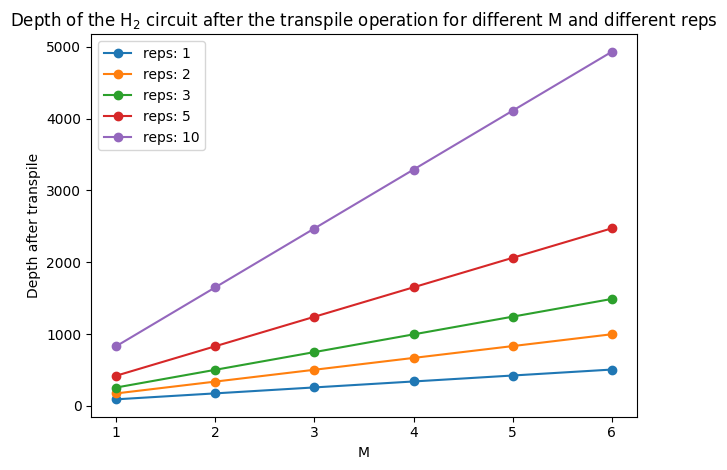

In [115]:
for i, reps in enumerate(reps_values):
    plt.plot(m_values, depth1[:, i], label=f"reps: {reps}", marker='o')
plt.legend()
plt.ylabel("Depth after transpile")
plt.xlabel("M");
plt.title("Depth of the H$_2$ circuit after the transpile operation for different M and different reps")
plt.tight_layout()
# plt.savefig("depth_h2.svg")

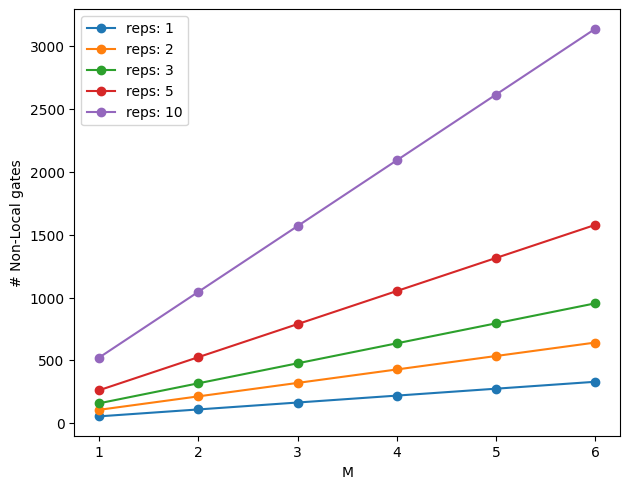

In [119]:
for i, reps in enumerate(reps_values):
    plt.plot(m_values, nngates[:, i], label=f"reps: {reps}", marker='o')
plt.legend()
plt.ylabel("# Non-Local gates")
# plt.title("Number of Non-Local gates in the H$_2$ circuit after the transpile\n operation for different M and different reps")
plt.tight_layout()
plt.xlabel("M");
plt.savefig("nlg_h2.svg")